In [13]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
import sparse
import xarray as xr
import numpy as np
import pandas as pd
from pprint import pprint

import netCDF4
import matplotlib.animation as animation
import imageio
import math
from IPython.display import Video
from tqdm import tqdm
import matplotlib.colors as colors

In [6]:
sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
# Exclude a specific function
del plot_singletime_var

from precac_functions import *

In [7]:
df = loadRelTable()
prec = loadPrec(5, df)
print(prec)
filename = loadPrecacFilename(5, df)
print(filename[119:129])

<xarray.DataArray 'Precac' (lat: 518, lon: 896)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.01931 0.05794 0.09657 0.1352 ... 19.91 19.95 19.99
  * lon      (lon) float32 130.0 130.1 130.1 130.1 ... 164.9 164.9 164.9 165.0



In [8]:
# Replace negative values with NaN
prec = xr.where(prec < 0, np.nan, prec)

In [9]:
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


In [10]:
print(df["path_dyamond"][600])

DYAMOND_9216x4608x74_7.5s_4km_4608_0000144720


## Goal: change the following function to handle `if variable == Precac:`

In [15]:
def plot_singletime_var(variable: str, timestamp: str):
    if variable == "Precac":
        seg_index = timestamp_to_seg_index(timestamp)
        print(seg_index)
        df = loadRelTable()
        if seg_index == 0:
            seg_index = 1
        prec = loadPrec(seg_index, df)
        prec_filename = loadPrecacFilename(seg_index, df)
        
        # Replace negative values with NaN
        prec = xr.where(prec < 0, np.nan, prec)
        
        variable_data = prec.values
        lon = prec.lon.values
        lat = prec.lat.values
        fig, ax = plt.subplots()
        plt.imshow(variable_data[:, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
        
        variable_name = "Surface Accum Precip."
        
        title = f"DYAMOND SAM {variable_name}\nTime Stamp: {timestamp}"
        unit = "mm"
        
    else:
        # Search for files containing the desired characters
        matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
        sorted_files = sorted(matching_files)
        i_t = find_file_with_string(sorted_files, timestamp, 119, 129) # finds index in list of files (119:129 are character indices for time stamp)

        file = sorted_files[i_t]
        dataset = netCDF4.Dataset(file)


        # getting data
        variable_data = dataset.variables[variable][:]
        # Get the lon and lat values
        lon = dataset.variables['lon'][:]
        lat = dataset.variables['lat'][:]
        # Plot the variable
        fig, ax = plt.subplots()
        plt.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    plt.xlabel('Longitude (° East)')
    plt.ylabel('Latitude (° North)')
    plt.title(title)
    ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
    cbar = plt.colorbar(label=unit)

    # Show the plot
    plt.show()
    

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_singletime_var(variable: str, timestamp: str):
    if variable == "Precac":
        seg_index = timestamp_to_seg_index(timestamp)
        print(seg_index)
        df = loadRelTable()
        if seg_index == 0:
            seg_index = 1
        prec = loadPrec(seg_index, df)
        prec_filename = loadPrecacFilename(seg_index, df)
        
        # Replace negative values with NaN
        prec = xr.where(prec < 0, np.nan, prec)
        
        variable_data = prec.values
        lon = prec.lon.values
        lat = prec.lat.values
        fig, ax = plt.subplots()
        
        # Plot the variable data in log scale
        plt.imshow(np.log(variable_data), origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
        
        variable_name = "Surface Accum Precip."
        
        title = f"DYAMOND SAM {variable_name}\nTime Stamp: {timestamp}"
        unit = "mm"
        
    else:
        # Search for files containing the desired characters
        matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
        sorted_files = sorted(matching_files)
        i_t = find_file_with_string(sorted_files, timestamp, 119, 129) # finds index in list of files (119:129 are character indices for time stamp)

        file = sorted_files[i_t]
        dataset = netCDF4.Dataset(file)


        # getting data
        variable_data = dataset.variables[variable][:]
        # Get the lon and lat values
        lon = dataset.variables['lon'][:]
        lat = dataset.variables['lat'][:]
        # Plot the variable data
        plt.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    
    plt.xlabel('Longitude (° East)')
    plt.ylabel('Latitude (° North)')
    plt.title(title)
    ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
    cbar = plt.colorbar(label=unit)

    # Show the plot
    plt.show()


0


<ipython-input-16-a7ef8b5f830e>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(variable_data), origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])


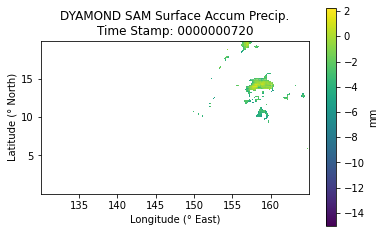

1


<ipython-input-16-a7ef8b5f830e>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(variable_data), origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])


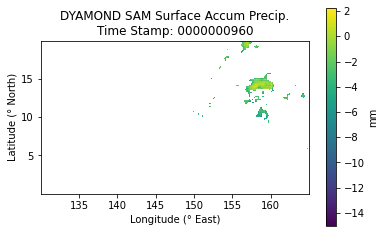

1916


<ipython-input-16-a7ef8b5f830e>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(variable_data), origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])


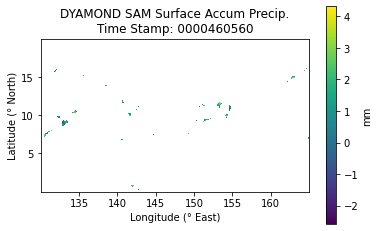

In [17]:
plot_singletime_var("Precac", "0000000720")
plot_singletime_var("Precac", "0000000960")
plot_singletime_var("Precac", "0000460560")

testing if values are below zero:

In [18]:
def plot_singletime_var(variable: str, timestamp: str):
    name_dict = {"OM500":"Pressure velocity at 500 mb", "T2mm":"2-m temperature", "OM850":"Pressure velocity at 850 mb", "Precac":"Surface Accum Precip.", "PW":"Precipitable Water", "CWP":"Cloud Water Path", "U10m":"10-m zonal wind", "RH500":"Relative Humidity 500mb", "PSFC":"P at the surface","V10m":"10-m meridional wind","SHF":"Sensible Heat Flux", "LHF":"Latent Heat Flux"}
    unit_dict = {"OM500":"Pa/s","T2mm":"K", "OM850":"Pa/s","Precac":"mm", "PW":"kg/m²", "CWP":"kg/m²", "U10m":"m/s", "RH500":"", "PSFC":"mbar", "10-m meridional wind":"m/s","SHF":"W/m²", "LHF":"W/m²"}
        
    if variable == "Precac":
        seg_index = timestamp_to_seg_index(timestamp)
        print(seg_index)
        df = loadRelTable()
        if seg_index == 0:
            seg_index = 1
        prec = loadPrec(seg_index, df)
        prec_filename = loadPrecacFilename(seg_index, df)
        
        # Replace negative values with NaN
        prec = xr.where(prec < 0, np.nan, prec)
        
        variable_data = prec.values
        lon = prec.lon.values
        lat = prec.lat.values
        fig, ax = plt.subplots()
        
        # Apply logarithmic scaling for positive values
        positive_data = np.where(variable_data > 0, np.log(variable_data), np.nan)
        # Plot positive values in blue color
        plt.imshow(positive_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap='Blues')
        
        # Identify and plot negative values in red color
        negative_data = np.where(variable_data < 0, variable_data, np.nan)
        plt.imshow(negative_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap='Reds')
        
        variable_name = "Surface Accum Precip."
        
        
        unit = "mm"
        
    else:
        # Search for files containing the desired characters
        matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
        sorted_files = sorted(matching_files)
        i_t = find_file_with_string(sorted_files, timestamp, 119, 129) # finds index in list of files (119:129 are character indices for time stamp)

        file = sorted_files[i_t]
        dataset = netCDF4.Dataset(file)


        # getting data
        variable_data = dataset.variables[variable][:]
        # Get the lon and lat values
        lon = dataset.variables['lon'][:]
        lat = dataset.variables['lat'][:]
        # Plot the variable data
        plt.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    
    plt.xlabel('Longitude (° East)')
    plt.ylabel('Latitude (° North)')
    title = f"DYAMOND SAM {name_dict.get(variable)}\nTime Stamp: {timestamp}"
    plt.title(title)
    ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
    if variable == "RH500":    
        cbar = plt.colorbar()
    else:
        cbar = plt.colorbar(label=unit_dict.get(variable))

    # Show the plot
    plt.show()


0


<ipython-input-18-4eb32792d31d>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), np.nan)


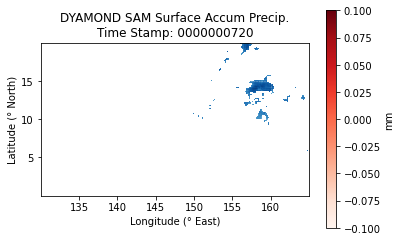

1


<ipython-input-18-4eb32792d31d>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), np.nan)


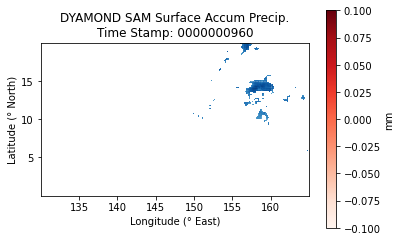

1916


<ipython-input-18-4eb32792d31d>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), np.nan)


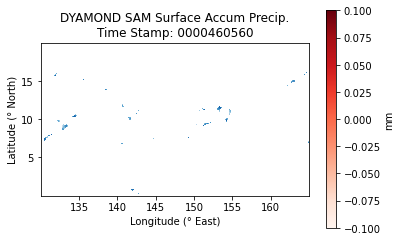

In [19]:
plot_singletime_var("Precac", "0000000720")
plot_singletime_var("Precac", "0000000960")
plot_singletime_var("Precac", "0000460560")

Fixing colorbar:

In [20]:
def plot_singletime_var(variable: str, timestamp: str):
    name_dict = {"OM500":"Pressure velocity at 500 mb", "T2mm":"2-m temperature", "OM850":"Pressure velocity at 850 mb", "Precac":"Surface Accum Precip.", "PW":"Precipitable Water", "CWP":"Cloud Water Path", "U10m":"10-m zonal wind", "RH500":"Relative Humidity 500mb", "PSFC":"P at the surface","V10m":"10-m meridional wind","SHF":"Sensible Heat Flux", "LHF":"Latent Heat Flux"}
    unit_dict = {"OM500":"Pa/s","T2mm":"K", "OM850":"Pa/s","Precac":"mm", "PW":"kg/m²", "CWP":"kg/m²", "U10m":"m/s", "RH500":"", "PSFC":"mbar", "V10m":"m/s","SHF":"W/m²", "LHF":"W/m²"}
        
    if variable == "Precac":
        seg_index = timestamp_to_seg_index(timestamp)
        print(seg_index)
        df = loadRelTable()
        if seg_index == 0:
            seg_index = 1
        prec = loadPrec(seg_index, df)
        prec_filename = loadPrecacFilename(seg_index, df)

        # Replace negative values with NaN
        prec = xr.where(prec < 0, np.nan, prec)

        variable_data = prec.values
        lon = prec.lon.values
        lat = prec.lat.values
        fig, ax = plt.subplots()

        # Apply logarithmic scaling for positive values
        positive_data = np.where(variable_data > 0, np.log(variable_data), 0)
        # Plot the variable data
        im = plt.imshow(positive_data, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], norm=LogNorm(vmin=0.0001))

        variable_name = "Surface Accum Precip."

        # Compute vmax based on non-NaN values
        valid_values = positive_data[~np.isnan(positive_data)]
        vmax = np.max(valid_values)
        
    else:
        # Rest of the code...
        matching_files = glob.glob(path_2D + '/*{}*'.format(variable))
        sorted_files = sorted(matching_files)
        i_t = find_file_with_string(sorted_files, timestamp, 119, 129)  # finds index in list of files (119:129 are character indices for time stamp)

        file = sorted_files[i_t]
        dataset = netCDF4.Dataset(file)

        # Getting data
        variable_data = dataset.variables[variable][:]
        # Get the lon and lat values
        lon = dataset.variables['lon'][:]
        lat = dataset.variables['lat'][:]
        # Plot the variable data and assign it to a variable
        fig, ax = plt.subplots()
        im = ax.imshow(variable_data[0, :, :], origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()])

    plt.xlabel('Longitude (° East)')
    plt.ylabel('Latitude (° North)')
    title = f"DYAMOND SAM {name_dict.get(variable)}\nTime Stamp: {timestamp}"
    plt.title(title)
    # ax.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.5)
    if variable == "RH500":
        cbar = plt.colorbar(im)  # Use the variable im here to create the colorbar
    else:
        cbar = plt.colorbar(im, label=unit_dict.get(variable))  # Use the variable im here to create the colorbar

    # Show the plot
    plt.show()


0


<ipython-input-20-d2b7d2d381e2>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


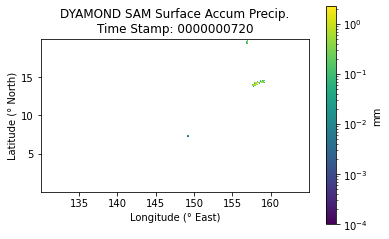

1


<ipython-input-20-d2b7d2d381e2>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


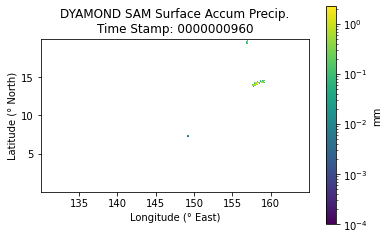

1916


<ipython-input-20-d2b7d2d381e2>:23: RuntimeWarning: divide by zero encountered in log
  positive_data = np.where(variable_data > 0, np.log(variable_data), 0)


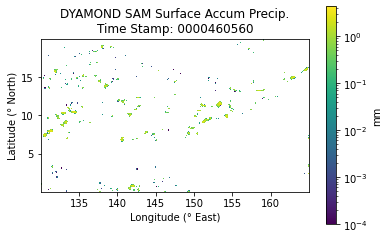

In [21]:
plot_singletime_var("Precac", "0000000720")
plot_singletime_var("Precac", "0000000960")
plot_singletime_var("Precac", "0000460560")

<ipython-input-20-d2b7d2d381e2>:43: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  variable_data = dataset.variables[variable][:]
<ipython-input-20-d2b7d2d381e2>:45: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = dataset.variables['lon'][:]
<ipython-input-20-d2b7d2d381e2>:46: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `

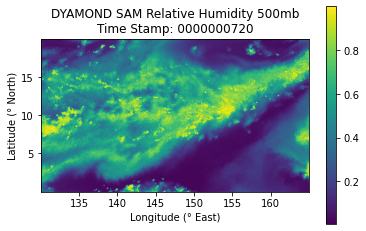

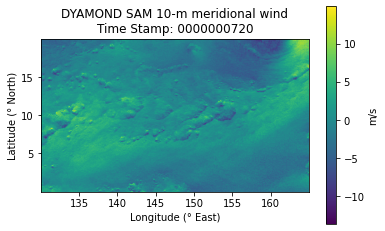

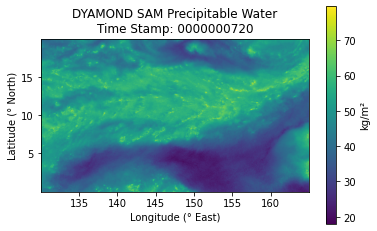

In [23]:
plot_singletime_var("RH500", "0000000720")
plot_singletime_var("V10m", "0000000720")
plot_singletime_var("PW", "0000000720")